In [1]:
from IPython.display import Image

## Today's Agenda
- Shortest Paths
- Greedy Algorithms
- Dijkstra’s Algorithm

### Greedy Algorithms

- An algorithm is designed to achieve optimum solution for a given problem. 
- In greedy algorithm approach, decisions are made from the given solution domain. 
- As being greedy, the closest solution that seems to provide an optimum solution is chosen.
- Greedy algorithms try to find a localized optimum solution, which may eventually lead to globally optimized solutions. 
- However, generally greedy algorithms do not provide globally optimized solutions.

### Counting Coins
- This problem is to count to a desired value by choosing the least possible coins and the greedy approach forces the algorithm to pick the largest possible coin. 
- If we are provided coins of 1, 2, 5 and 10 and we are asked to count  18 then the greedy procedure will be
- **Step 1** Select one 10 coin, the remaining count is 8
- **Step 2** Then select one 5 coin, the remaining count is 3
- **Step 3**Then select one 2 coin, the remaining count is 1
- **Step 4** And finally, the selection of one 1 coins solves the problem.

- Though, it seems to be working fine, for this count we need to pick only 4 coins. 
- But if we slightly change the problem then the same approach may not be able to produce the same optimum result.

- For the currency system, where we have coins of 1, 7, 10 value, counting coins for value 18 will be absolutely optimum but for count like 15, it may use more coins than necessary. 
- For example, the greedy approach will use 10 + 1 + 1 + 1 + 1 + 1, total 6 coins. Whereas the same problem could be solved by using only 3 coins (7 + 7 + 1)

- Hence, we may conclude that the greedy approach picks an immediate optimized solution and may fail where global optimization is a major concern.

- Most networking algorithms use the greedy approach. Some of them are:
    - Travelling Salesman Problem
    - Prim's Minimal Spanning Tree Algorithm
    - Kruskal's Minimal Spanning Tree Algorithm
    - Dijkstra's Minimal Spanning Tree Algorithm
    - Graph - Map Coloring
    - Graph - Vertex Cover
    - Knapsack Problem
    - Job Scheduling Problem

## Shortest Paths
- Goal: Find the shortest path from a given start node to all other nodes in terms of the weights on the edges.

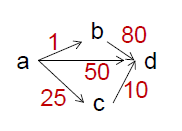

In [2]:
Image(filename='images/week-12/sp1.png', width=200)

### Dijkstra's Algorithm

- The idea: similar to BFS, but adapted to handle weights
    - Grow the set of nodes whose shortest distance has been computed
    - Nodes not in the set will have a “best distance so far”
    - A priority queue will turn out to be useful for efficiency
- An example of a greedy algorithm
    - A series of steps
    - At each one the locally optimal choice is made

- Initially, start node has cost 0 and all other nodes have cost $\infty$
- At each step:
    - Pick closest unknown vertex v
    - Add it to the “cloud” of known vertices
    - Update distances for nodes with edges from v
    
- Dijkstra’s algorithm is utilized to find the shortest path from a single source vertex to all other vertices in the given graph. 
- Dijkstra’s algorithm works for both directed and undirected graphs.
- Assume that the weights are positive.
- Dijkstra’s algorithm makes a tree of the shortest path from the starting node, the source, to all other nodes (points) in the graph. 
- This algorithm is also known as the single-source shortest path algorithm.

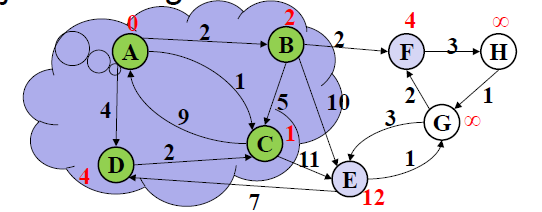

In [3]:
Image(filename='images/week-12/sp2.png', width=400)

### The Algorithm
- 1. For each node $v$, set $v.cost = \infty$ and $v.known = false$
- 2. Set $source.cost = 0$ // start node
- 3. While there are unknown nodes in the graph
    - a) Select the unknown node $v$ with lowest cost
    - b) Mark $v$ as known
    - c) For each edge $(v,u)$ with weight $w$,
        - $c1 = v.cost + w$ // cost of best path through $v$ to $u$
        - $c2 = u.cost$ // cost of best path to $u$ previously known
        - if $(c1 < c2)${ // if the path through $v$ is better
            - $ u.cost = c1$
            - $u.path = v$ // for computing actual paths
}

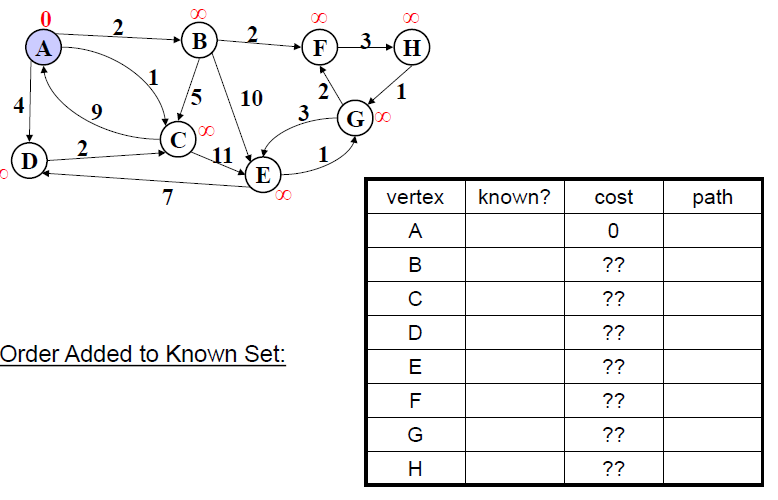

In [4]:
Image(filename='images/week-12/dks1.png', width=500)

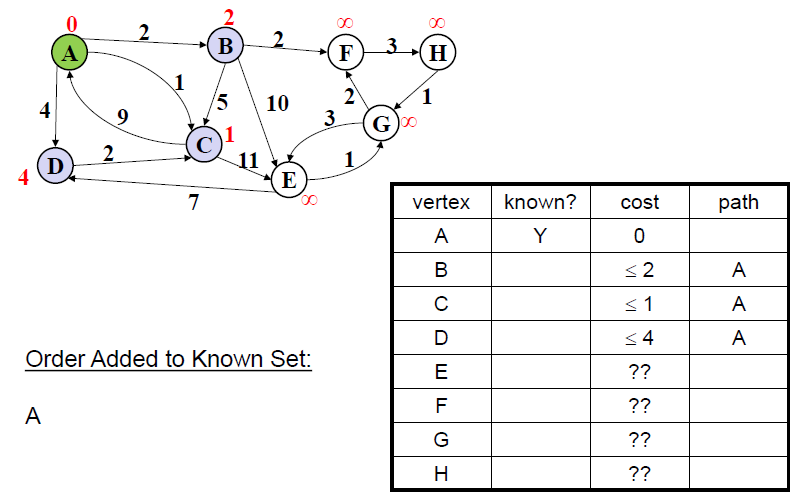

In [5]:
Image(filename='images/week-12/dks2.png', width=500)

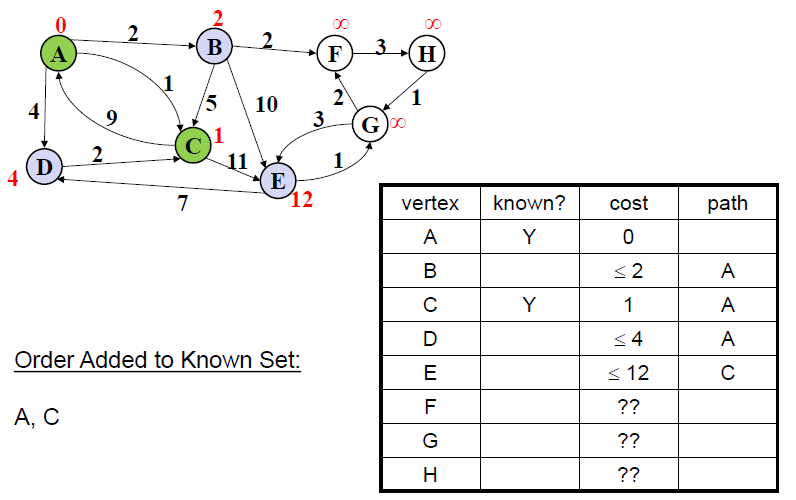

In [6]:
Image(filename='images/week-12/dks3.png', width=500)

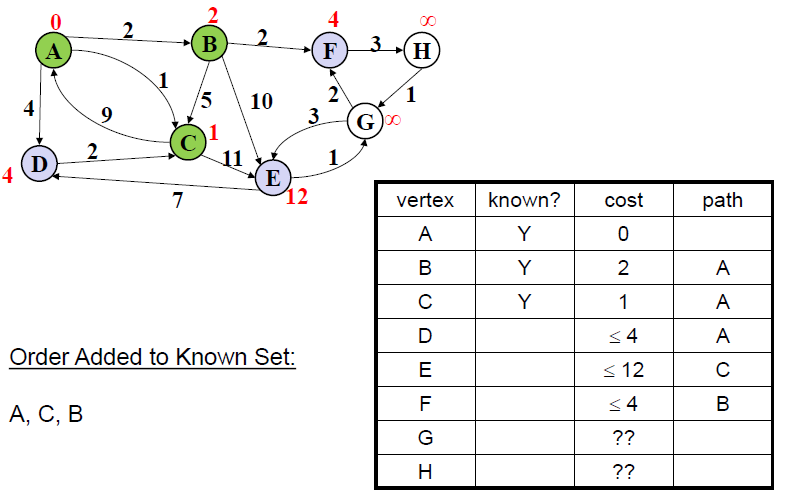

In [7]:
Image(filename='images/week-12/dks4.png', width=500)

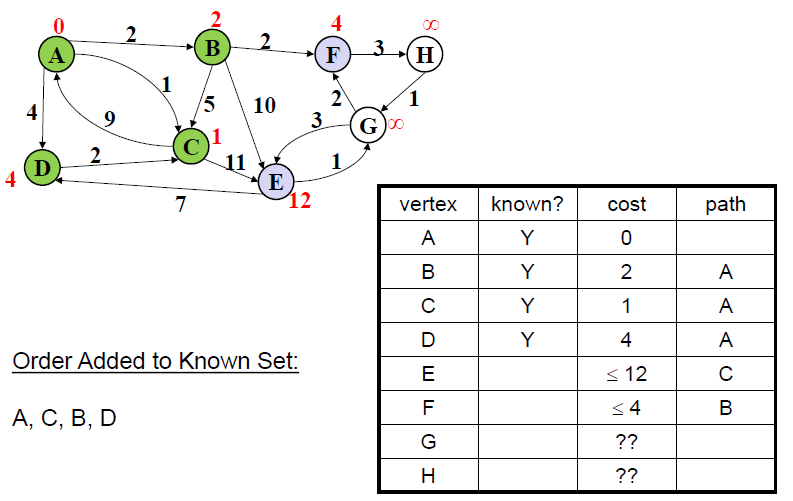

In [8]:
Image(filename='images/week-12/dks5.png', width=500)

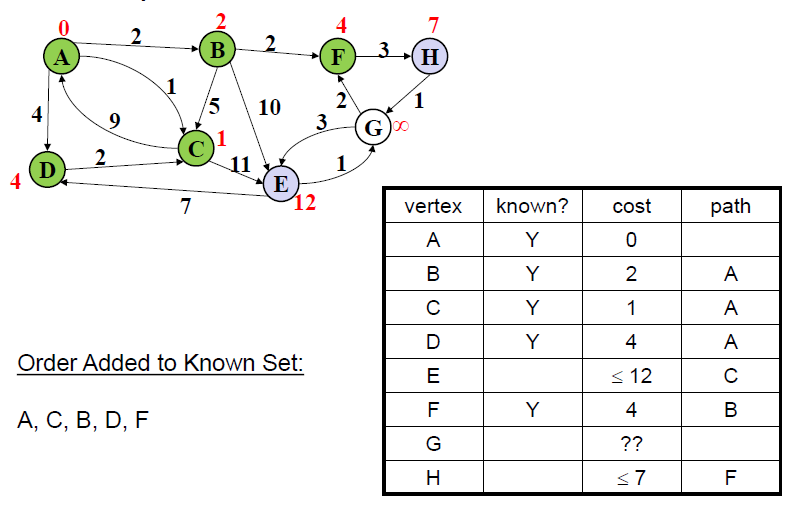

In [9]:
Image(filename='images/week-12/dks6.png', width=500)

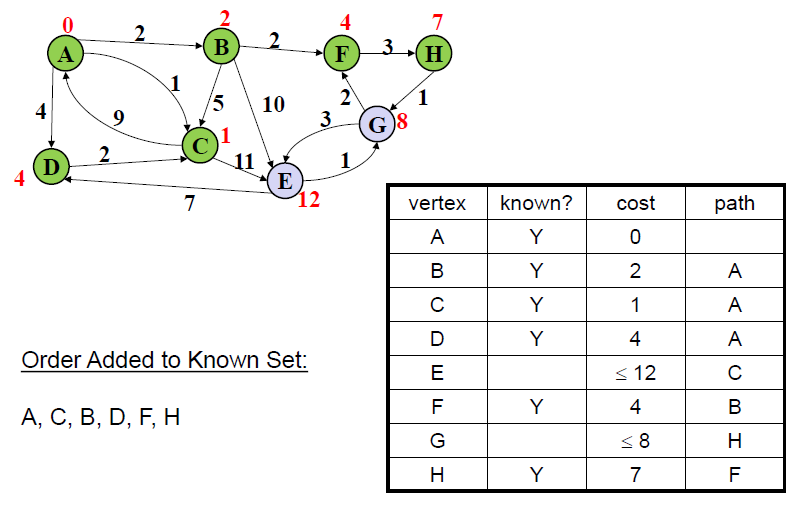

In [10]:
Image(filename='images/week-12/dks7.png', width=500)

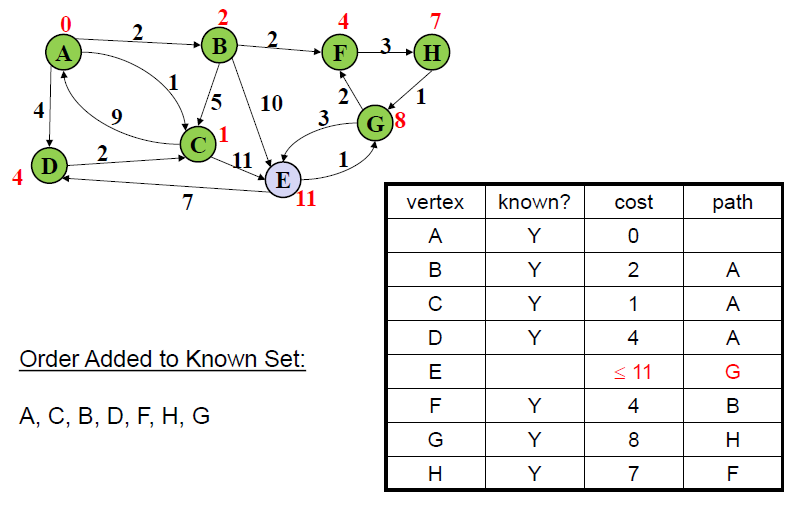

In [11]:
Image(filename='images/week-12/dks8.png', width=500)

### Features

- When a vertex is marked known, the cost of the shortest path to that node is known
    - The path is also known by following back-pointers
- While a vertex is still not known, another shorter path to it might still be found

#### Dijkstra's implementation by adjacency matrix representation of the graph is below.

In [12]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)

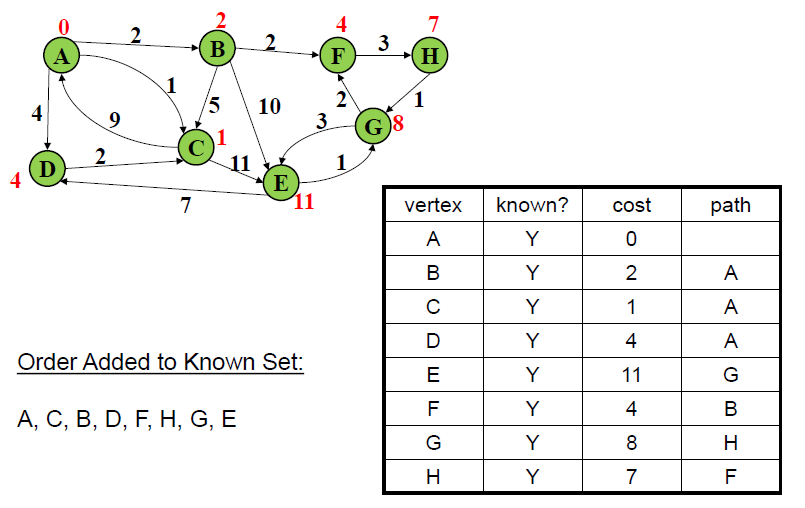

In [14]:
Image(filename='images/week-12/dks9.png', width=500)

In [ ]:
# Driver program
gg = Graph(8)
gg.graph = [
           [0, 2, 1, 4, 0, 0, 0, 0],
           [0, 0, 5, 0, 10, 2, 0, 0],
           [9, 0, 0, 0, 11, 0, 0, 0],
           [0, 0, 2, 0, 0, 0, 0, 0],
           [0, 0, 0, 7, 0, 0, 1, 0],
           [0, 0, 0, 0, 0, 0, 0, 3],
           [0, 0, 0, 0, 3, 2, 0, 0],
           [0, 0, 0, 0, 0, 0, 1, 0]
           ]
gg.dijkstra(0)

In [ ]:
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]
g.dijkstra(7)

### Notes: 
<ol>
<li>The code is for undirected graphs, the same Dijkstra function can be used for directed graphs also.</li>
<li>The code finds the shortest distances from the source to all vertices, but after simple modification, it can find the shortest distance from the source to a single target,(just break the for loop when the picked minimum distance vertex is equal to the target.</li>
<li>Time Complexity of the implementation is $\mathcal{O}(V^{2})$, however if the input graph is represented using adjacency list, it can be reduced to $\mathcal{O}(E\log{V})$ with the help of a binary heap.</li>
<li>Dijkstra’s algorithm doesn’t work for graphs with negative weight cycles.</li>
</ol>